In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
data = pd.read_csv("../src/Data/Ad_Performance/Social_Media_Advertising.csv")
data.head()


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign_ID,300000.0,NaN,NaN,NaN,550444.804487,260252.586037,100001.0,325003.5,551164.5,776284.5,999998.0
Target_Audience,300000,9,Women 18-24,33593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign_Goal,300000,4,Brand Awareness,75248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,300000,4,15 Days,75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_Used,300000,4,Facebook,75164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conversion_Rate,300000.0,NaN,NaN,NaN,0.080009,0.040563,0.01,0.05,0.08,0.11,0.15
Acquisition_Cost,300000,250998,$15000.00,12065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROI,300000.0,NaN,NaN,NaN,3.177691,2.4612,0.0,0.93,2.67,5.33,8.0
Location,300000,5,Los Angeles,60322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,300000,3,English,100116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
columns_to_drop = [
    "Campaign_ID", "Acquisition_Cost", "ROI",
    "Location", "Date", "Company",
]
data = data.drop(columns=columns_to_drop)

In [7]:
data['CTR'] = data['Clicks'] / data['Impressions']


In [8]:
data.head()

,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR
0,Men 35-44,Product Launch,15 Days,Instagram,0.15,Spanish,500,3000,7,Health,0.166667
1,Women 45-60,Market Expansion,15 Days,Facebook,0.01,French,500,3000,5,Home,0.166667
2,Men 45-60,Product Launch,15 Days,Instagram,0.08,Spanish,500,3000,9,Technology,0.166667
3,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,Spanish,293,1937,1,Health,0.151265
4,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,French,293,1937,1,Home,0.151265


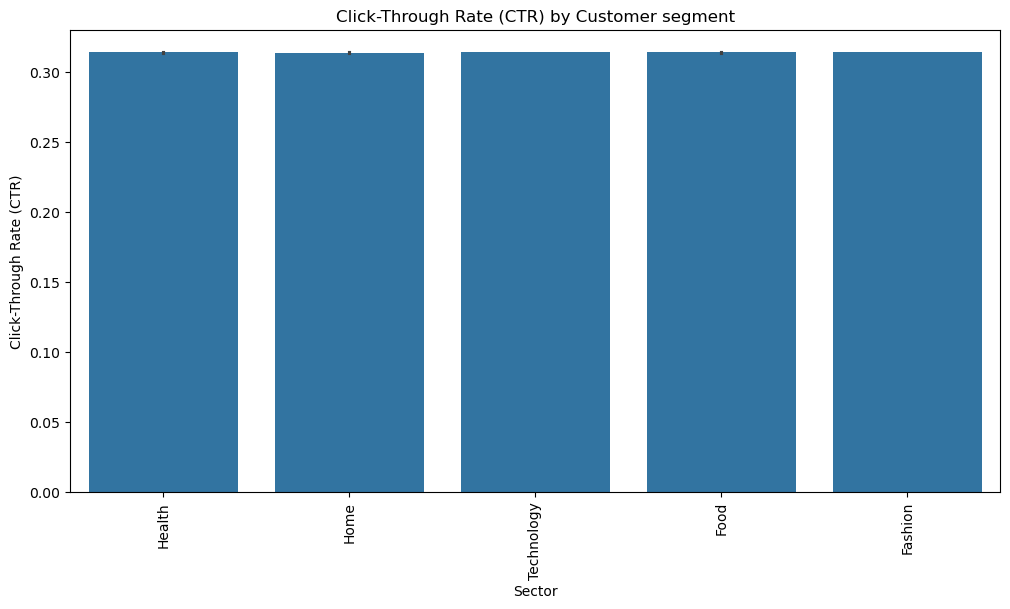

In [11]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Segment', y='CTR', data=data)
plt.title('Click-Through Rate (CTR) by Customer segment')
plt.xlabel('Sector')
plt.ylabel('Click-Through Rate (CTR)')
plt.xticks(rotation=90)
plt.show()


In [17]:
data.describe()

,Conversion_Rate,Clicks,Impressions,Engagement_Score,CTR
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.080009,18153.670370,56034.236387,4.369217,0.314156
std,0.040563,11027.023294,32583.136334,3.156492,0.024657
min,0.010000,293.000000,1937.000000,1.000000,0.151187
25%,0.050000,8821.000000,28362.000000,1.000000,0.301698
50%,0.080000,17230.000000,54098.000000,4.000000,0.325373
75%,0.110000,26808.000000,80925.250000,7.000000,0.331266
max,0.150000,40000.000000,120000.000000,10.000000,0.333333


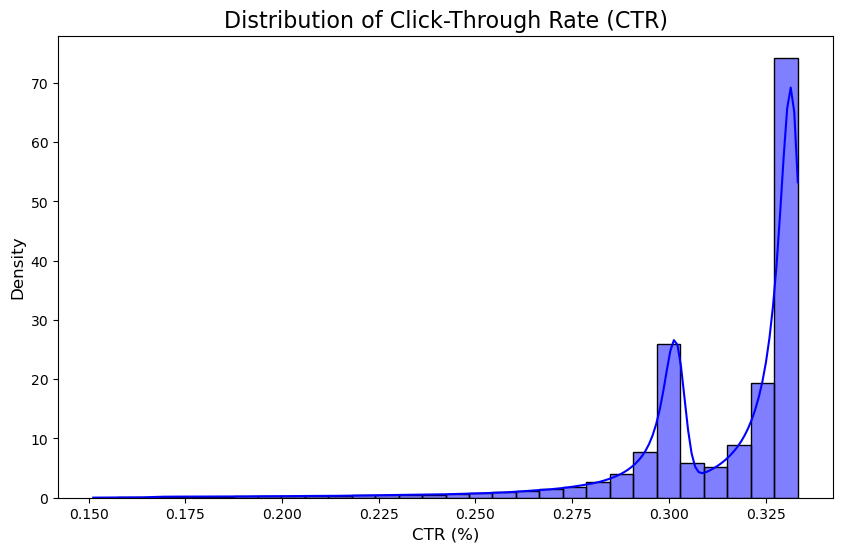

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CTR'], kde=True, bins=30, color='blue', stat='density')

# Adding labels and title
plt.title('Distribution of Click-Through Rate (CTR)', fontsize=16)
plt.xlabel('CTR (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

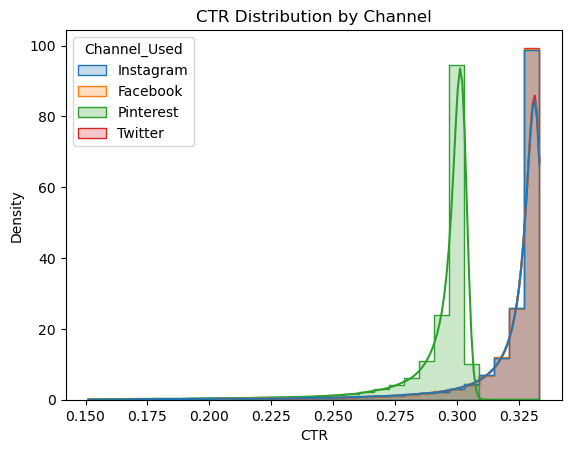

In [21]:
sns.histplot(data, x="CTR", hue="Channel_Used", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("CTR Distribution by Channel")
plt.show()


In [22]:

lowest_ctr_campaign = data.loc[data['CTR'].idxmin()]
print("Least CTR Campaign:\n", lowest_ctr_campaign)


Least CTR Campaign:
 Target_Audience           All Ages
Campaign_Goal       Increase Sales
Duration                   15 Days
Channel_Used             Pinterest
Conversion_Rate                0.1
Language                    French
Clicks                         293
Impressions                   1938
Engagement_Score                 1
Customer_Segment              Home
CTR                       0.151187
Name: 6, dtype: object


In [23]:

highest_ctr_campaign = data.loc[data['CTR'].idxmax()]
print("Highest CTR Campaign:\n", highest_ctr_campaign)

Highest CTR Campaign:
 Target_Audience        Women 18-24
Campaign_Goal       Product Launch
Duration                   60 Days
Channel_Used             Instagram
Conversion_Rate               0.03
Language                    French
Clicks                       39978
Impressions                 119934
Engagement_Score                 3
Customer_Segment           Fashion
CTR                       0.333333
Name: 299832, dtype: object


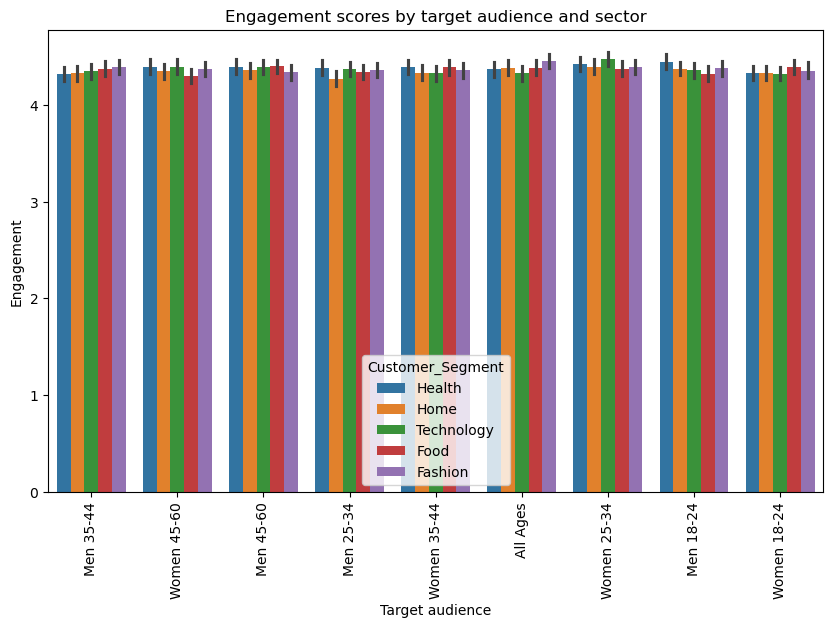

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Target_Audience', y='Engagement_Score', hue='Customer_Segment', data=data)
plt.title('Engagement scores by target audience and sector')
plt.xlabel('Target audience')
plt.ylabel('Engagement')
plt.xticks(rotation=90)
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Target_Audience   300000 non-null  object 
 1   Campaign_Goal     300000 non-null  object 
 2   Duration          300000 non-null  object 
 3   Channel_Used      300000 non-null  object 
 4   Conversion_Rate   300000 non-null  float64
 5   Language          300000 non-null  object 
 6   Clicks            300000 non-null  int64  
 7   Impressions       300000 non-null  int64  
 8   Engagement_Score  300000 non-null  int64  
 9   Customer_Segment  300000 non-null  object 
 10  CTR               300000 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 25.2+ MB


In [27]:
# Split Target_Audience into Sex and Age_Group
data[['Sex', 'Age_Group']] = data['Target_Audience'].str.split(' ', expand=True)


In [28]:
data['Sex'] = data['Sex'].map({'Men': 0, 'Women': 1})

In [31]:
data.drop(columns='Target_Audience', inplace=True)


In [32]:
print(data['Duration'].unique())


['15 Days' '30 Days' '45 Days' '60 Days']


In [33]:
data['Duration'] = data['Duration'].str.extract('(\d+)', expand=False).astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Iyed\AppData\Local\Temp\ipykernel_17984\1176340487.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Duration'] = data['Duration'].str.extract('(\d+)', expand=False).astype(int)


In [35]:
print(data['Channel_Used'].unique())

['Instagram' 'Facebook' 'Pinterest' 'Twitter']
